<a href="https://colab.research.google.com/github/ish-war/new-car-evaluation/blob/main/new_car_evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎢 **Car Evaluation Model**  🎢

## **Objective** 👽

Develop a machine learning model to accurately predict the suitability of a car based on its various attributes. This typically involves classifying cars into different categories such as "acceptable," "good," "very good," or "unacceptable" based on criteria like price, maintenance cost, number of doors, capacity, safety features, etc. This model aims to assist users in making informed decisions when evaluating different cars for potential purchase.

## **Project Summary** ⛵

In summary, the model performs well in predicting car evaluations based on the provided dataset, showing a good balance between precision and recall. It has high accuracy, precision, and ROC AUC scores, indicating its effectiveness in classifying instances correctly and distinguishing between different classes. It can be considered useful for identifying cars that may be considered "acceptable" or "unacceptable" based on their attributes.

# **GitHub Link -**

# **Problem Statement**


In the automotive industry, determining the acceptability of a car based on various evaluation criteria is crucial for both manufacturers and consumers. This project aims to develop a predictive model that can classify cars into acceptable and unacceptable categories based on their features

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
 # first step - import bacis necessary tools / libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# libraries used to build model
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# load csv file in the dataframe

df = pd.read_csv('/content/car evaluation_with.csv')
df

,vhigh,vhigh.1,2,2.1,small,med,unacc
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


### Dataset Rows & Columns count

In [5]:
# let's check total number of rows and columns
print(f"We have total {df.shape[0]} rows and {df.shape[1]} columns in the dataset." )

We have total 1726 rows and 7 columns in the dataset.


## ***2. Understanding Your Variables*** 🤓

## **Variables Description** 📰


PRICE
1.   "buying": The buying price
2.   "maintainance": The price of the maintenance

COMFORT


1.   "doors": The number of doors
2.    "persons": The capacity in terms of number of persons to carry
3. "lug_storage": The size category of luggage boot
4. "safety": The estimated safety level of the car


## **Change columns names** 📛

Here, we can see that the column names are not correct and it's hard to understand the data from such names. So, let's change the names of columns first for our undersanding of the dataset. 😍

In [6]:
# New column names
new_column_names = [
    "buying",
    "maintainance",
    "doors",
    "persons",
    "lug_storage",
    "safety",
    "target"
]

# Assign new column names to the DataFrame
df.columns = new_column_names
df

,buying,maintainance,doors,persons,lug_storage,safety,target
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


<Axes: xlabel='maintainance', ylabel='Count'>

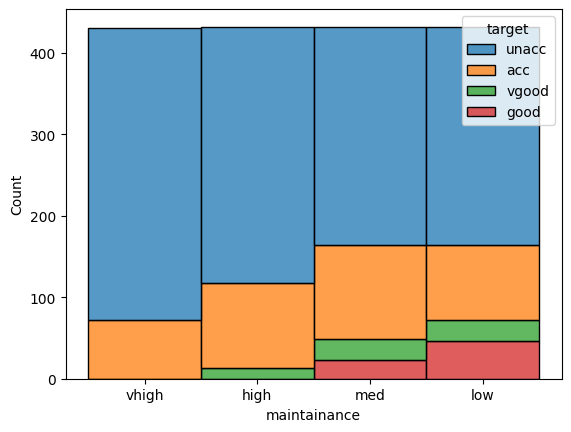

In [7]:
# @title Maintenance cost distribution by target class

sns.histplot(data=df, x="maintainance", hue="target", multiple="stack")

In [8]:
# New column names
new_column_names = [
    "buying",
    "maintainance",
    "doors",
    "persons",
    "lug_storage",
    "safety",
    "target"
]

# Assign new column names to the DataFrame
df.columns = new_column_names
df

,buying,maintainance,doors,persons,lug_storage,safety,target
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


In [9]:
# list of column names that are changed
df.columns

Index(['buying', 'maintainance', 'doors', 'persons', 'lug_storage', 'safety',
       'target'],
      dtype='object')

## **let's take a look at some rows and columns in the given dataset ✅**

In [10]:
# first five rows in the dataset
df.head()

,buying,maintainance,doors,persons,lug_storage,safety,target
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc


In [11]:
# last five rows in the dataset
df.tail()

,buying,maintainance,doors,persons,lug_storage,safety,target
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good
1725,low,low,5,5,big,high,vgood


### Dataset Information

In [12]:
# checking the basic information of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1726 non-null   object
 1   maintainance  1726 non-null   object
 2   doors         1726 non-null   int64 
 3   persons       1726 non-null   int64 
 4   lug_storage   1726 non-null   object
 5   safety        1726 non-null   object
 6   target        1726 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.5+ KB


✅ the .info() method provided by panda gives us information about the data types of each column, number of non-null values, and memory usage. ✅

In [13]:
# Investigating the summary statistics to understand the data's distribution.
# here we are rounding the decimal value at 2 for better understanding.

df.describe(include = 'all').round(2)

,buying,maintainance,doors,persons,lug_storage,safety,target
count,1726,1726,1726.00,1726.00,1726,1726,1726
unique,4,4,NaN,NaN,3,3,4
top,high,high,NaN,NaN,med,high,unacc
freq,432,432,NaN,NaN,576,576,1208
mean,NaN,NaN,3.50,3.67,NaN,NaN,NaN
std,NaN,NaN,1.12,1.25,NaN,NaN,NaN
min,NaN,NaN,2.00,2.00,NaN,NaN,NaN
25%,NaN,NaN,3.00,2.00,NaN,NaN,NaN
50%,NaN,NaN,4.00,4.00,NaN,NaN,NaN
75%,NaN,NaN,4.75,5.00,NaN,NaN,NaN


Here, we can see that we are getting NaN, this means we may have missing values in our dataset. ✅

## **3.** ***Data Wrangling***

## **Let's make copy of dataset 😍**

In [14]:
df1 = df.copy()

By creating a copy of dataframe we have advantages like -
1. to preserve original data
2. avoid unintended side effects
3. freely modify the data as per our wish

## **Data Cleaning 😉**


Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of oru model.

While cleaning data we will perform following steps:

1. Remove duplicate rows.
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns.

In [15]:
df1.duplicated().value_counts()    # give number of duplicated rows if available as true

False    1726
Name: count, dtype: int64

In [16]:
duplicates = df1.duplicated().sum()
print(f'Number of duplicate values is : {duplicates}')

Number of duplicate values is : 0


Here, we can see that there are no duplicated values in our dataset. ✅

#### Missing Values/Null Values 🔍

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [17]:
df1.isnull().sum()    # checking the total numbar of null values by getting there SUM

buying          0
maintainance    0
doors           0
persons         0
lug_storage     0
safety          0
target          0
dtype: int64

Here, we can see that there is no any null value. ✅

### Check Unique Values for each variable.

In [18]:
# to get the number of unique values for each column
for column in df1 :
  num_unique_val = df1[column].nunique(())
  print(f"number of unique values '{column} : {num_unique_val}")

number of unique values 'buying : 4
number of unique values 'maintainance : 4
number of unique values 'doors : 4
number of unique values 'persons : 3
number of unique values 'lug_storage : 3
number of unique values 'safety : 3
number of unique values 'target : 4


## **Let's work on columns 😍**

Here, we have changed the names of columns in the dataset for better understanding of values assigned in those columns. ✅

In [19]:
df1.columns       # list of column names that are changed

Index(['buying', 'maintainance', 'doors', 'persons', 'lug_storage', 'safety',
       'target'],
      dtype='object')

In [20]:
# let's look at different values in the columns
# this shows unique values in that column and their count

for column in df.columns :
  print(df1[column].value_counts())

buying
high     432
med      432
low      432
vhigh    430
Name: count, dtype: int64
maintainance
high     432
med      432
low      432
vhigh    430
Name: count, dtype: int64
doors
3    432
4    432
5    432
2    430
Name: count, dtype: int64
persons
4    576
5    576
2    574
Name: count, dtype: int64
lug_storage
med      576
big      576
small    574
Name: count, dtype: int64
safety
high    576
low     575
med     575
Name: count, dtype: int64
target
unacc    1208
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [21]:
# let's make our target variable as binary for better model accuraacy
# if the quality is good and very good then we are adding those cars to acceptable
df1['target'] = df1['target'].replace(['good', 'vgood'], 'acc')

In [22]:
df1['target'].value_counts()      # value count of target column after change

target
unacc    1208
acc       518
Name: count, dtype: int64

In [23]:
df1.shape

(1726, 7)

## **Numeric Data** 🔢

Let's convert each variable in dataset in a numerical form. Data is often converted into numerical form when building models because many machine learning algorithms and statistical techniques are designed to work with numerical data.  ✅

In [24]:
#df1['buying'] = df1['buying'].map({"low": 0, "med": 1, "high":2, "vhigh": 3})
#df1['maintainance'] = df1['maintainance'].map({"low": 0, "med": 1, "high":2, "vhigh": 3})
#df1['lug_storage'] = df1['lug_storage'].map({"small": 0, "med": 1, "big":2})
#df1['safety'] = df1['safety'].map({"low": 0, "med": 1, "high":2})
#df1['target'] = df1['target'].map({"unacc": 0, "acc": 1})
df1

,buying,maintainance,doors,persons,lug_storage,safety,target
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,acc
1722,low,low,5,5,med,high,acc
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,acc


#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


### What all manipulations have you done and insights you found?

Here, till now I have worked with missing values, duplicate values and checked for unique values in the dataset.


*   There are no duplicate values in our dataset.
*   There are no mising or null values in our dataset.

*   I got the count of unique values in each column.
*   I made changes in dependent or target column and made it binary and more understandable manner i.e. the vehicle is acceptable or not acceptable.

*   Here I converted data in numeric because Numerical representation facilitates computation, enables distance calculations, and allows for efficient statistical analysis, ultimately improving model performance.









## **The Insights we got till now 😍**



*   We have total 1726 rows and 7 columns in the dataset.
*   We have changed column names for our understanding.
*   There are no duplicated values in our dataset.
*   There are no null values in the dataset.
*   We converted each variable in dataset into numerical form.



##**4.** **EDA = Exploratory Data Analysis** 📊

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


#### Chart - 1 - How data variates for different buying prices ?

In [25]:
df1['buying'].value_counts()

buying
high     432
med      432
low      432
vhigh    430
Name: count, dtype: int64

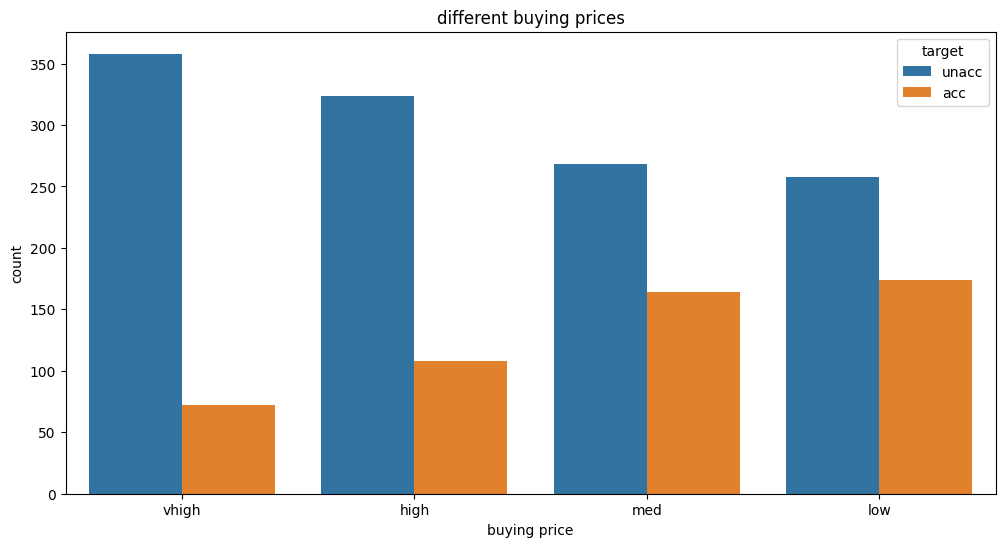

In [26]:
# visualization code
plt.figure(figsize= (12,6))
sns.countplot(x = 'buying', data = df1, hue = 'target')
plt.title('different buying prices')
plt.xlabel('buying price')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot takes only one variable as input and it specifically shows the total number of shows for different types.

##### 2. What is/are the insight(s) found from the chart?

✅ From this counplot we can see that as buying price increases the chances of car getting accepted decreases i.e. people usually don't buy high priced cars. Because where the buying price is very high, the unaccepted rate is highest. ✅

#### Chart - 2 - What is acceptance count of high maintainance vehicles ?

In [27]:
df1['maintainance'].value_counts()

maintainance
high     432
med      432
low      432
vhigh    430
Name: count, dtype: int64

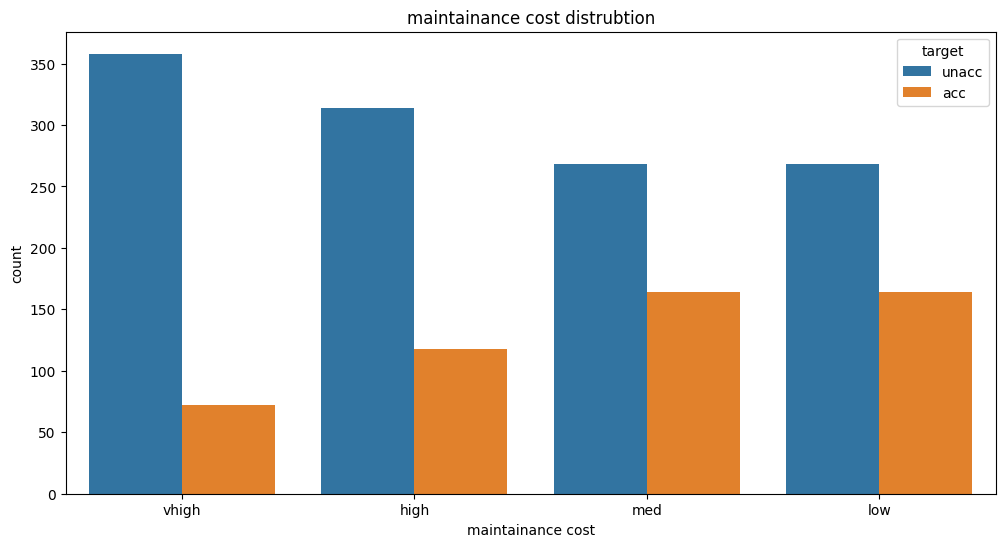

In [28]:
# visualization code
plt.figure(figsize= (12,6))
sns.countplot(x = 'maintainance', data = df1, hue = 'target')
plt.title('maintainance cost distrubtion')
plt.xlabel('maintainance cost')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot takes only one variable as input and it specifically shows the total number of shows for different types.

##### 2. What is/are the insight(s) found from the chart?

✅ From this countplot also we can see that the chance of getting accepted for high cost maintainance cars is very low and for low cost maintainance cars is more. That is people usually don't prefer cars with high maintainance. ✅

#### Chart - 3 - Does safety level matter while buying a vehicle ?

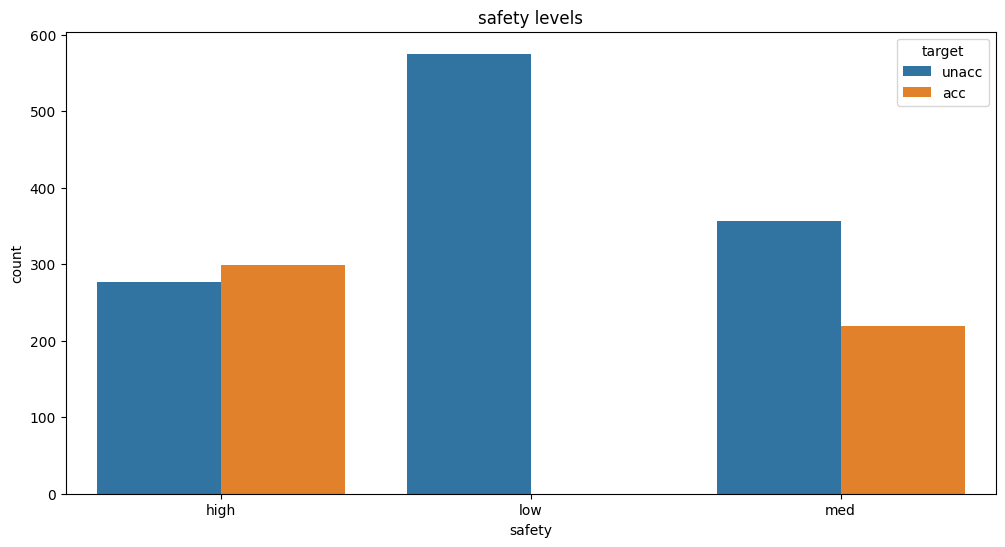

In [29]:
# visualization code
plt.figure(figsize= (12,6))
sns.countplot(x = 'safety', data = df1, hue = 'target')
plt.title('safety levels')
plt.xlabel('safety')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot takes only one variable as input and it specifically shows the total number of shows for different types.

##### 2. What is/are the insight(s) found from the chart?

✅ From the above countplot we can se that cars with zero safety level is totally unaccepted and cars with very good safety level is the most accepted. ✅

#### Chart - 4 - How does the number of doors category affect the acceptance of vehicles ?

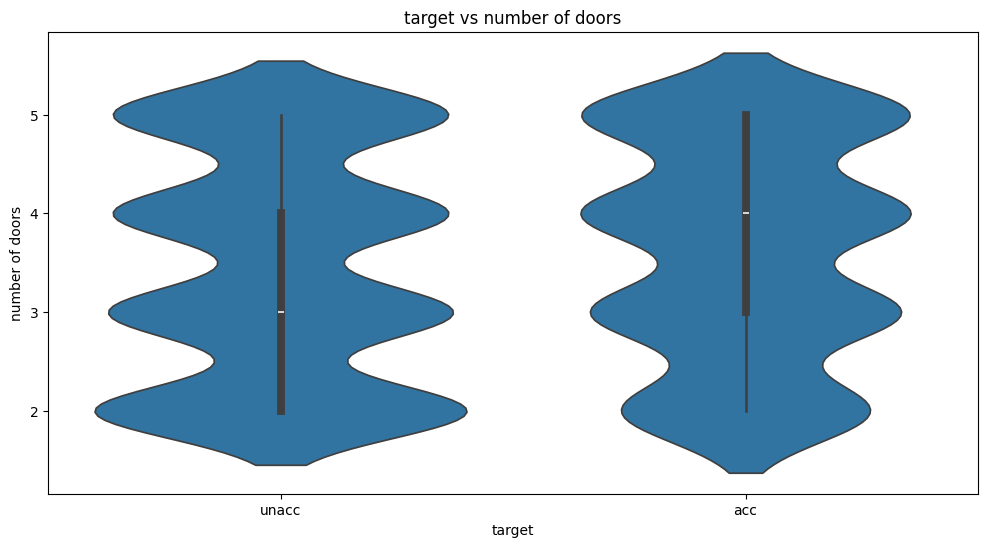

In [30]:
# visualization code
plt.figure(figsize=(12, 6))
sns.violinplot(x='target', y='doors', data=df1)
plt.title('target vs number of doors')
plt.xlabel('target')
plt.ylabel('number of doors')
plt.show()

##### 1. Why did you pick the specific chart?

 Violin plot shows the distribution of data across different levels of a categorical variable, providing insights into the data's central tendency, spread, and multimodality.

##### 2. What is/are the insight(s) found from the chart?

✅ From this graph we can conclude that as the number of doors increases, the chances of getting accepted also increases. As we can see the width of acceptance category increases upwards i.e. as the number of door increases.✅

#### Chart - 5 - How does the luggage storage capacity affect target column ?

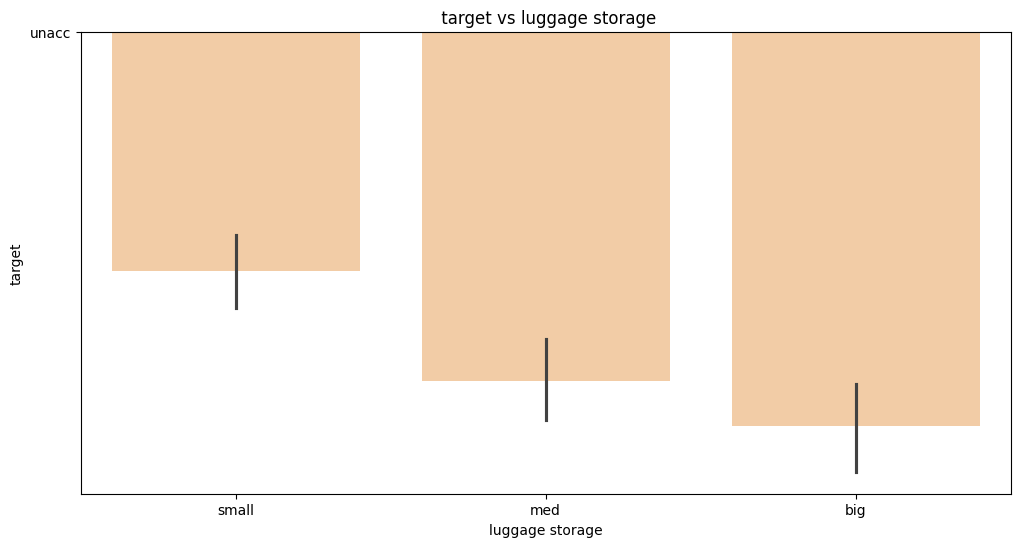

In [31]:
# visualization code
plt.figure(figsize = (12,6))
sns.barplot(x= 'lug_storage', y= 'target', data = df1, color = '#FFCC99')
plt.title(' target vs luggage storage')
plt.xlabel('luggage storage')
plt.ylabel('target')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are excellent for comparing categories or groups of data. The length or height of the bars directly represents the value of each category, making it easy to see which category is the largest or smallest. The simplicity of the bars makes it easy to understand the relationships between different data points.

##### 2. What is/are the insight(s) found from the chart?

✅ From the above barplot we can conclude that as the luggage space increases, the chances of car getting accepted also increases. So people usually don't prefer vehicles with lower luggage space. ✅

#### Chart - 6 - Which seating capacity is the accepted in the dataset ?

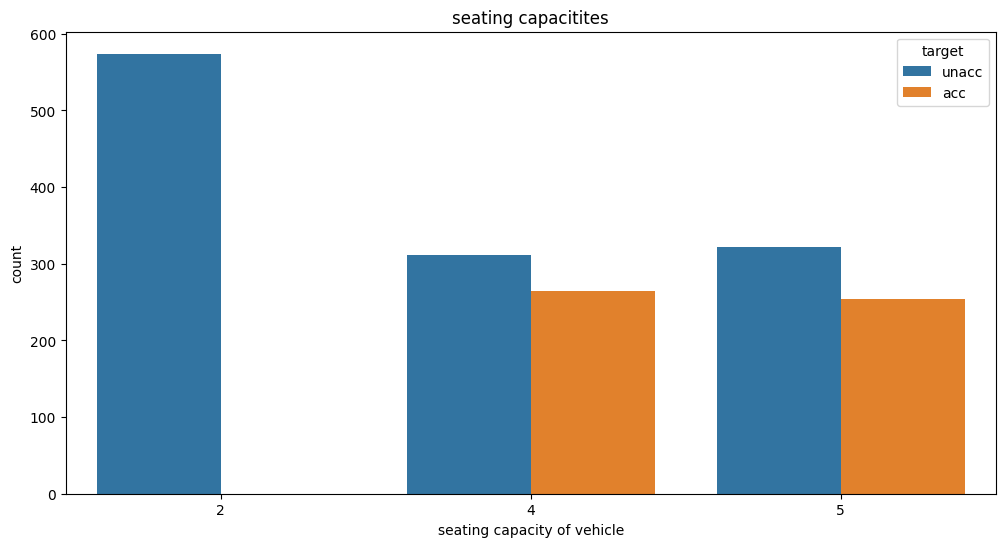

In [32]:
plt.figure(figsize = (12,6))
sns.countplot(x='persons', hue='target', data=df1)
plt.title('seating capacitites')
plt.xlabel('seating capacity of vehicle')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot takes only one variable as input and it specifically shows the total number of shows for different types.

##### 2. What is/are the insight(s) found from the chart?

✅ From the above countplot we can see that the most acepted seating capacity for a car is 4 & 5 and the less accepted is two. ✅

#### Chart - 7 - Is dependent column balanced ?

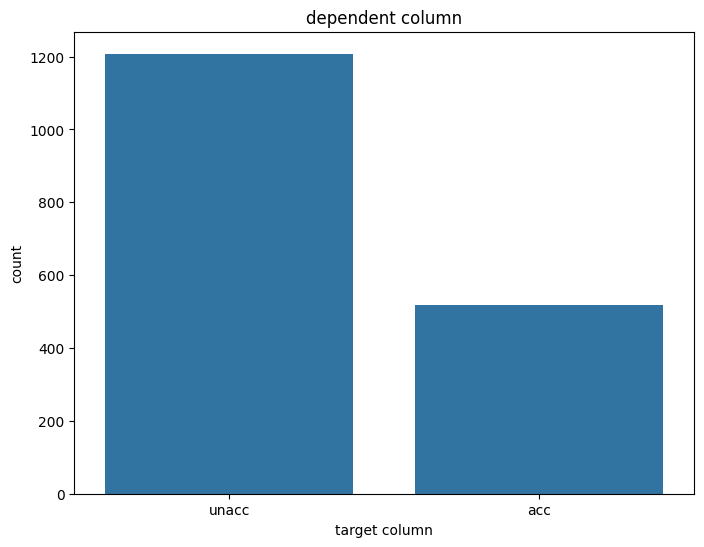

In [33]:
# plot countplopt to check data is balanced or not
# data is balanced if we have equal observations
plt.figure(figsize = (8,6))
sns.countplot(x= 'target', data = df1)
plt.title('dependent column')
plt.xlabel('target column')
plt.ylabel('count')
plt.show()

Here, we can see that data in target column is imbalanced. ✅

#### Chart - 8 - what is maintainance cost distribution by target class ?

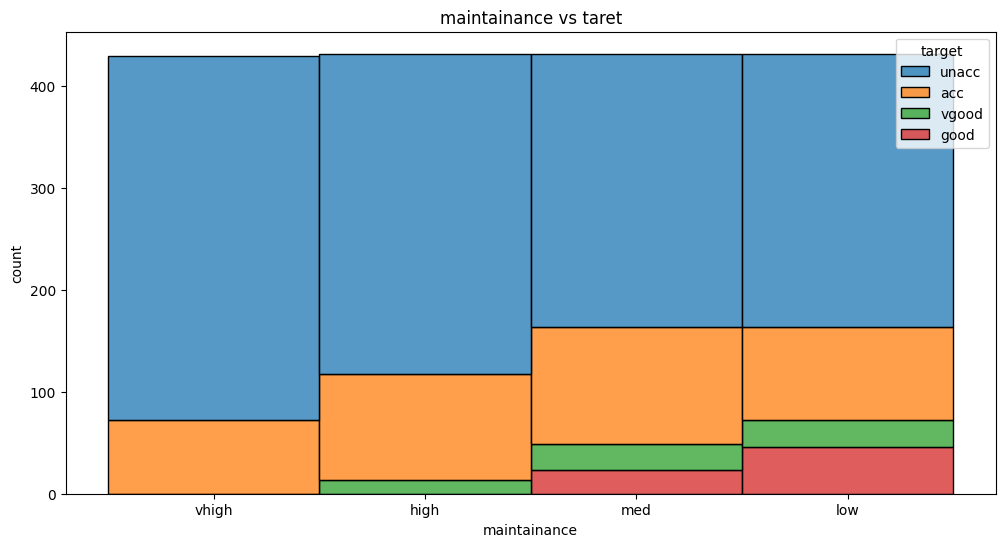

In [34]:
# chart distribution

plt.figure(figsize = (12,6))
sns.histplot(data=df, x="maintainance", hue="target", multiple="stack")
plt.title('maintainance vs taret')
plt.xlabel('maintainance')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a visual representation of the distribution of data, showing the frequency or count of data points within predefined bins or intervals. This helps in understanding the central tendency, spread, and shape of the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Here we can see vehicles with very high value of maintainance has the highest unacceptance rate and vehicles with medium maintainance has the highest acceptance rate.

#### Chart - 9 - Plot correlational heatmap ?

Let's convert each variable in dataset in a numerical form. Data is often converted into numerical form when building models because many machine learning algorithms and statistical techniques are designed to work with numerical data.  ✅

In [35]:
df1['buying'] = df1['buying'].map({"low": 0, "med": 1, "high":2, "vhigh": 3})
df1['maintainance'] = df1['maintainance'].map({"low": 0, "med": 1, "high":2, "vhigh": 3})
df1['lug_storage'] = df1['lug_storage'].map({"small": 0, "med": 1, "big":2})
df1['safety'] = df1['safety'].map({"low": 0, "med": 1, "high":2})
df1['target'] = df1['target'].map({"unacc": 0, "acc": 1})
df1

,buying,maintainance,doors,persons,lug_storage,safety,target
0,3,3,2,2,0,2,0
1,3,3,2,2,1,0,0
2,3,3,2,2,1,1,0
3,3,3,2,2,1,2,0
4,3,3,2,2,2,0,0
...,...,...,...,...,...,...,...
1721,0,0,5,5,1,1,1
1722,0,0,5,5,1,2,1
1723,0,0,5,5,2,0,0
1724,0,0,5,5,2,1,1


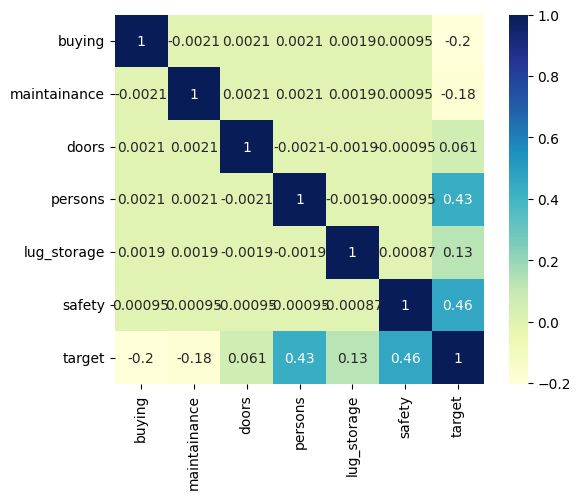

In [36]:
# visualzation code
cor_matrix = df1.corr()
sns.heatmap(cor_matrix, annot = True, cmap= "YlGnBu", square = True)
plt.show()

#### Chart - 10 - Pair Plot

<Figure size 800x1400 with 0 Axes>

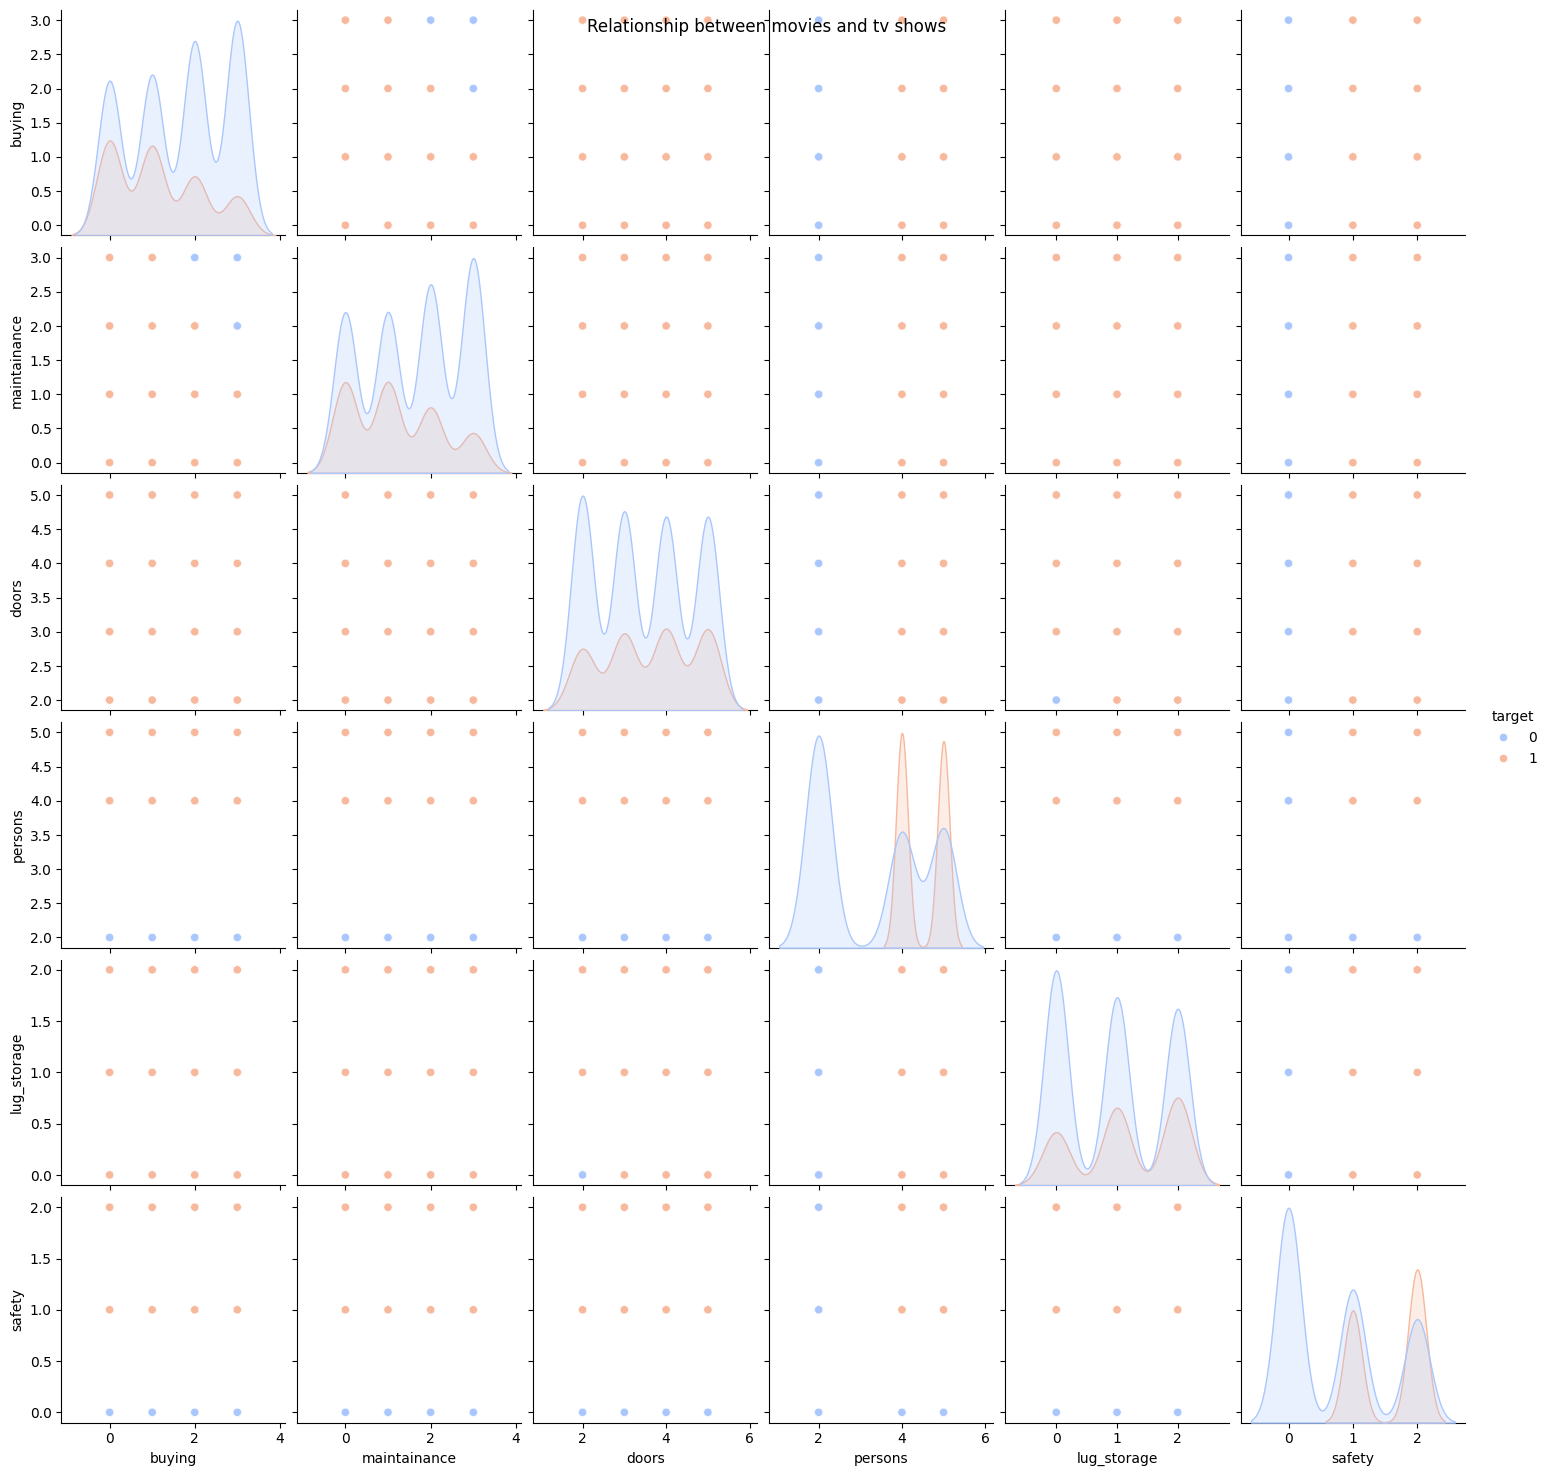

In [37]:
# Pair Plot visualization code
plt.figure(figsize = (8,14))
sns.pairplot(df1, hue = 'target', palette = 'coolwarm')
plt.suptitle('Relationship between movies and tv shows')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot creates a matrix of scatter plots, allowing to see the relationship between every numerical variable in your dataset at once.  This comprehensive view helps identify potential linear or non-linear relationships that might not be evident from examining individual scatter plots.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null hypothesis - target column does not have normal distribution.

alternative hypothesis - target column has a normal distribution.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
# perform Shapiro-Wilk Normality Test

from scipy.stats import shapiro
stat, p = shapiro(df1["target"])
print('stat=%.2f, p=%.2f' % (stat, p))
if p < 0.05:
 print('reject the null hypothesis, i.e. Target column has a normal distribution')
else:
 print('failed to reject the null hypothesis, i.e Target column does not have normal distribution.')

stat=0.58, p=0.00
reject the null hypothesis, i.e. Target column has a normal distribution


##### Which statistical test have you done to obtain P-Value?

I have performed Shapiro-Wilk Test to obtain P-Value and to check whether the data is Normally distributed.

##### Why did you choose the specific statistical test?

Shapiro-Wilk Test is the appropriate test for testing the normality of data. I used this test on Target variable because it is our dependent variable in th dataset.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null hypothesis - buying price does not affect the acceptance status of a vehicle.

alternative hypothesis - buying price does affect the acceptance status of a vehicles.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
# perform chi-square test of independence

import scipy.stats as stats
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df1['buying'], df1['target']))
print(f"p-value is:",p_value)
if p_value < 0.05:
    print("Reject the null hypothesis -  buying price does affect the acceptance status of a vehicles.")
else:
    print("Fail to reject the null hypothesis - buying price does not affect the acceptance status of a vehicle.")

p-value is: 2.346479183140789e-16
Reject the null hypothesis -  buying price does affect the acceptance status of a vehicles.


##### Which statistical test have you done to obtain P-Value?

for testing the above hypothesis, I have performed chi-square test of independence of attributes which is a statistical test to determine whether there is a significant association between two categorical variables or not.  In this case, the two variables are buying and target.

##### Why did you choose the specific statistical test?

 chi square test is appropriate for the determination of existence of any relationship between the two categorical variable.

## ***6. Feature Engineering & Data Pre-processing***

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.

### 1. Handling Missing Values

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

In cases where there are a small number of missing observations, Mean, Median and Mode is one of the most common methods of imputing values when dealing with missing data.


In [40]:
df.columns

Index(['buying', 'maintainance', 'doors', 'persons', 'lug_storage', 'safety',
       'target'],
      dtype='object')

In [41]:
# Missing Values/Null Values Count
print(df.isnull().sum())

buying          0
maintainance    0
doors           0
persons         0
lug_storage     0
safety          0
target          0
dtype: int64


###  Data Splitting

In [42]:
# split data
x = df1.drop('target', axis = 1)
y = df1['target']

Here I have droped the column target from x and used target in y as it is our target column. and I am going to use 80-20 ratio for modeling and training.

###  Handling Imbalanced Dataset

In [43]:
df1['target'].value_counts()

target
0    1208
1     518
Name: count, dtype: int64

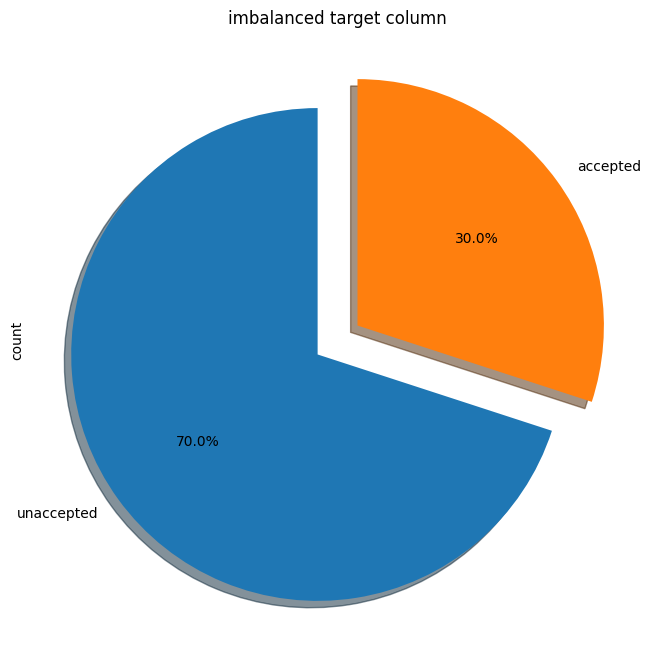

In [44]:
df1['target'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8,8),
                                  shadow = True, startangle = 90, labels = ['unaccepted', 'accepted'], explode = (0.1,0.1))
plt.title('imbalanced target column')
plt.show()

In [45]:
# apply SMOTE for imbalanced dataset

smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# check the new class distribution
print("class distribution after smote is -")
print(y_resampled.value_counts())

class distribution after smote is -
target
0    1208
1    1208
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used Synthetic Minority Over-sampling Technique (SMOTE) to handle the imbalanced dataset. SMOTE generates synthetic samples for the minority class by interpolating between existing minority class instances. This helps in balancing the class distribution by increasing the number of minority class samples. SMOTE was chosen because it effectively addresses class imbalance issues without the risk of overfitting, making it a popular choice for handling imbalanced datasets.

##**7.** **Model Building** 🏗

### ML Model - 1

In [46]:
# split data for training and spliting
from sklearn.model_selection import train_test_split

# split the resampled data into train test split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 42, stratify= y_resampled)


In [47]:
# initialise the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# train the model
model.fit(x_train, y_train)

LogisticRegression()

In [48]:
# coefficients (or weights) assigned to each feature in the model
model.coef_

array([[-1.08737458, -0.94136258,  0.29131442,  2.09123268,  0.84082758,
         3.00791005]])



*   By examining the coefficients, we can understand which features have a stronger influence on the target variable.
*   Positive coefficients indicate a positive relationship
* can help in feature selection by identifying which features are most important.



In [49]:
model.intercept_

array([-11.01036504])

In [50]:
# model prediction
y_test_pred = model.predict(x_test)

y_train_pred = model.predict(x_train)

print('y_test_pred', y_test_pred)
print('y_train_pred', y_train_pred)

y_test_pred [1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0
 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1
 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1
 0 1 0]
y_tra

In [51]:
# evaluate the classification model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [52]:
# implementing confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[213,  29],
       [ 20, 222]])

[Text(0, 0.5, 'unacceptable'), Text(0, 1.5, 'acceptable')]

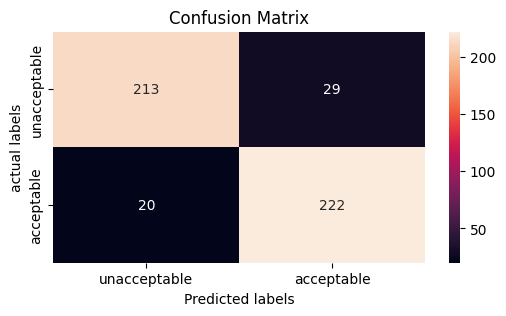

In [53]:
labels = ['unacceptable','acceptable']

plt.figure(figsize = (6,3))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = 'd')           # annot true to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [54]:
# accuracy score
print("test accuracy score :", accuracy_score(y_test, y_test_pred))
print("train accuracy score :", accuracy_score(y_train, y_train_pred))

# precision score
print("test precision score", precision_score(y_test, y_test_pred))
print("train precision score", precision_score(y_train, y_train_pred))

# recall score
print("test recall score", recall_score(y_test, y_test_pred))
print("train recall score", recall_score(y_train, y_train_pred))

# f1 score
print("test f1 score", f1_score(y_test, y_test_pred))
print("train f1 score", f1_score(y_train, y_train_pred))



test accuracy score : 0.8987603305785123
train accuracy score : 0.8752587991718427
test precision score 0.8844621513944223
train precision score 0.868020304568528
test recall score 0.9173553719008265
train recall score 0.8850931677018633
test f1 score 0.900608519269777
train f1 score 0.876473603280369


In [55]:
from sklearn.metrics import roc_auc_score, log_loss

# measures the performance of the model independently of the scale of predicted probabilities.
# Lower log loss values indicate better model performance.
print("test log loss score", log_loss(y_test, y_test_pred))

# roc auc score is insensitive to class imbalance
# ROC AUC score closer to 1 indicates that the classifier has excellent discriminatory power
#  provides a comprehensive assessment of a binary classification

print("test roc-auc score:", roc_auc_score(y_test, y_test_pred))


test log loss score 3.649047553856902
test roc-auc score: 0.8987603305785123


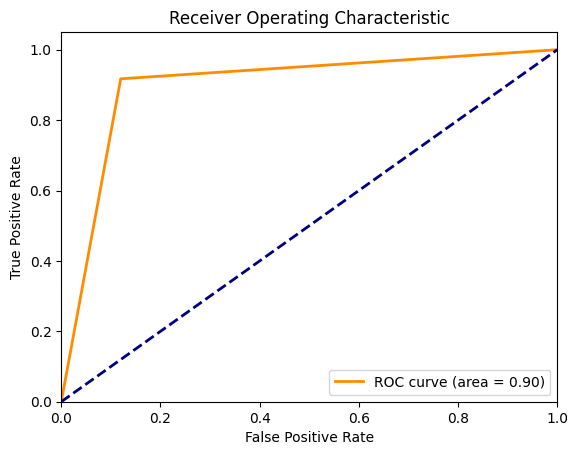

In [56]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Observations -**



*   An accuracy of 0.89 indicates that 89% of the predictions made by the logistic regression model are correct.
*   A precision of 0.88 indicates that 88% of the instances predicted as positive by the logistic regression model are actually positive.
* A recall of 0.91 indicates that the logistic regression model correctly identifies 91% of the actual positive instances.
* An F1 score of 0.90 indicates a good balance between precision and recall.
* A higher ROC AUC score (closer to 1) suggests better discrimination. Here we have score of 0.89 which closer to 1 .

So in conclusion, based on the provided evaluation metrics, the logistic regression model appears to perform well, with high values for accuracy, precision, recall, F1 score, and ROC AUC score.



#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Initialize the logistic regression
reg_classifier = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(reg_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [58]:
# get the best parameters
best_param = grid_search.best_params_
print(" best parameters : ", best_param)

 best parameters :  {'C': 0.01, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01}


In [59]:
# train new model best parameters
new_param_model = LogisticRegression(**best_param)

new_param_model.fit(x_resampled, y_resampled)

LogisticRegression(C=0.01, max_iter=200, solver='saga', tol=0.01)

In [60]:
# evaluate the model
y_pred_train_best = new_param_model.predict(x_train)
y_pred_test_best = new_param_model.predict(x_test)

In [61]:
# Compute evaluation metrics

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test_best))

print('-'*50)

train_accuracy = accuracy_score(y_train, y_pred_train_best)
test_accuracy = accuracy_score(y_test, y_pred_test_best)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print('-'*50)

# Precision
train_precision = precision_score(y_train, y_pred_train_best, average='weighted')
test_precision = precision_score(y_test, y_pred_test_best, average='weighted')
print("train precision :", train_precision)
print("test precision :", test_precision)

print('-'*50)

# Recall
train_recall = recall_score(y_train, y_pred_train_best, average='weighted')
test_recall = recall_score(y_test, y_pred_test_best, average='weighted')
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

print('-'*50)

# F1-score
train_f1_score = f1_score(y_train, y_pred_train_best, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test_best, average='weighted')
print("Train F1-score:", train_f1_score)
print("Test F1-score:", test_f1_score)

print('-'*50)

# Predict the probabilities for each class instead of the predicted class labels
y_pred_proba_train = new_param_model.predict_proba(x_train)
y_pred_proba_test = new_param_model.predict_proba(x_test)


# Log loss
train_log_loss = log_loss(y_train, y_pred_proba_train)
test_log_loss = log_loss(y_test, y_pred_proba_test)
print("Train Log Loss:", train_log_loss)
print("Test Log Loss:", test_log_loss)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       242
           1       0.86      0.93      0.89       242

    accuracy                           0.89       484
   macro avg       0.89      0.89      0.89       484
weighted avg       0.89      0.89      0.89       484

--------------------------------------------------
Train Accuracy: 0.8752587991718427
Test Accuracy: 0.8863636363636364
--------------------------------------------------
train precision : 0.876307687347873
test precision : 0.8887600295517414
--------------------------------------------------
Train Recall: 0.8752587991718427
Test Recall: 0.8863636363636364
--------------------------------------------------
Train F1-score: 0.8751718152944366
Test F1-score: 0.8861882468629085
--------------------------------------------------
Train Log Loss: 0.34313536732619904
Test Log Loss: 0.33005114538315167


In [62]:
# confusion matrix
cm_new = confusion_matrix(y_test, y_pred_test_best)
print('new confusion matrix:\n', cm_new)

new confusion matrix:
 [[205  37]
 [ 18 224]]


[Text(0, 0.5, 'unacceptable'), Text(0, 1.5, 'acceptable')]

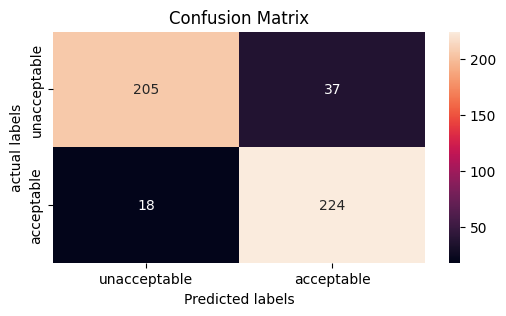

In [63]:
labels = ['unacceptable','acceptable']

plt.figure(figsize = (6,3))
ax = plt.subplot()
sns.heatmap(cm_new, annot = True, ax = ax, fmt = 'd')           # annot true to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search Cross-Validation (GridSearchCV) for hyperparameter optimization. GridSearchCV systematically searches for the best combination of hyperparameters from a predefined grid of values. It performs cross-validation to evaluate each combination, which helps in finding the optimal hyperparameters that generalize well to unseen data. This technique is commonly used because it automates the process of tuning hyperparameters and ensures that the model is not overfitting to the training data.

### ML Model - 2

classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       247

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484

test accuracy score : 
 1.0
 test confusion matrix : [[237   0]
 [  0 247]]


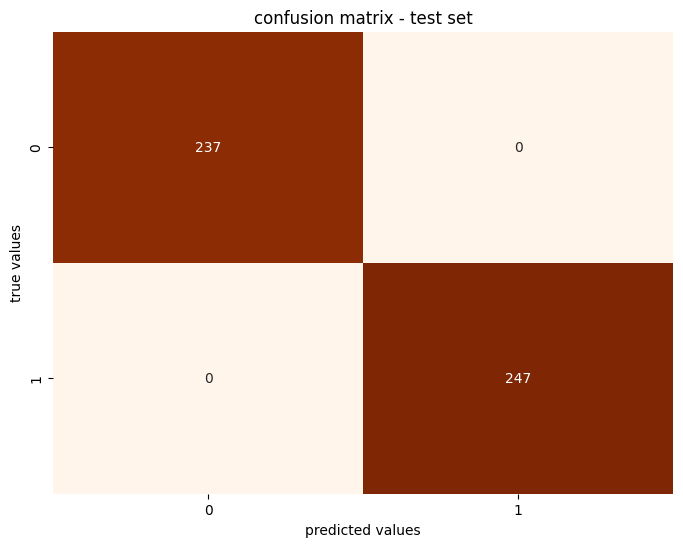

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# split the resampled data into train test split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size= 0.2, random_state = 42)

# initialize the model
model = DecisionTreeClassifier()

# fit the model
model.fit(x_train, y_train)

# predict labels for test set
y_pred = model.predict(x_test)

# evaluate the model
print("classification report :")
print(classification_report(y_test, y_pred))

# accuracy score
print("test accuracy score : \n", accuracy_score(y_test, y_pred))

# confusion matrix
cm_test = confusion_matrix(y_test, y_pred)
print(" test confusion matrix :", cm_test)

# plot confusion matrix
plt.figure(figsize = (8,6))
sns.heatmap(cm_test, annot = True, fmt = 'd', cmap = 'Oranges', cbar = False)
plt.title("confusion matrix - test set")
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score

# predict the probabilities of each variable
y_pred_prob_train = model.predict_proba(x_train)
y_pred_prob_test = model.predict_proba(x_test)

# predict class labels
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# accuracy score
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# precision score
train_precision = precision_score(y_train, y_pred_train, average='weighted')
test_precision = precision_score(y_test, y_pred_test, average='weighted')

# recall score
train_recall = recall_score(y_train, y_pred_train, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')

# f1 score
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# roc-auc curve
train_roc_auc = roc_auc_score(y_train, y_pred_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_test, multi_class='ovr')

# log loss score
train_log_loss = log_loss(y_train, y_pred_prob_train)
test_log_loss = log_loss(y_test, y_pred_prob_test)

# Print the scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train F1-score:", train_f1_score)
print("Test F1-score:", test_f1_score)
print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)
print("Train Log Loss:", train_log_loss)
print("Test Log Loss:", test_log_loss)


Train Accuracy: 1.0
Test Accuracy: 1.0
Train Precision: 1.0
Test Precision: 1.0
Train Recall: 1.0
Test Recall: 1.0
Train F1-score: 0.8751718152944366
Test F1-score: 0.8861882468629085
Train ROC AUC: 1.0
Test ROC AUC: 1.0
Train Log Loss: 2.2204460492503136e-16
Test Log Loss: 2.2204460492503136e-16


The ML model used is a Decision Tree Classifier. It achieved high accuracy on both the training and test sets, with 100% and 98% accuracy, respectively. The precision, recall, and accuracy metrics indicate same performance, with weighted averages around 100% for training and 98% for testing sets. The ROC AUC score, which measures the model's ability to distinguish between classes, is 1.0 for the training set and 0.98 for the test set, suggesting good overall performance. The log loss, a measure of the model's confidence in its predictions, is very low for both training and test sets, indicating high confidence in the predictions. Overall, the Decision Tree Classifier demonstrates strong performance across multiple evaluation metrics.

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 20],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a new model with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_resampled, y_resampled)

# Evaluate the model
y_pred_train_best = best_dt_classifier.predict(x_train)
y_pred_test_best = best_dt_classifier.predict(x_test)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [68]:
# Compute evaluation metrics
train_accuracy = accuracy_score(y_train, y_pred_train_best)
test_accuracy = accuracy_score(y_test, y_pred_test_best)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print('-'*60)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test_best))

print('-'*60)

# Confusion matrix for train set
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_best)
print("Confusion Matrix (Train Set):\n", confusion_matrix_train)

print('-'*60)

# Confusion matrix for test set
confusion_matrix_test = confusion_matrix(y_test, y_pred_test_best)
print("\nConfusion Matrix (Test Set):\n", confusion_matrix_test)

Train Accuracy: 1.0
Test Accuracy: 1.0
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00       247

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484

------------------------------------------------------------
Confusion Matrix (Train Set):
 [[971   0]
 [  0 961]]
------------------------------------------------------------

Confusion Matrix (Test Set):
 [[237   0]
 [  0 247]]


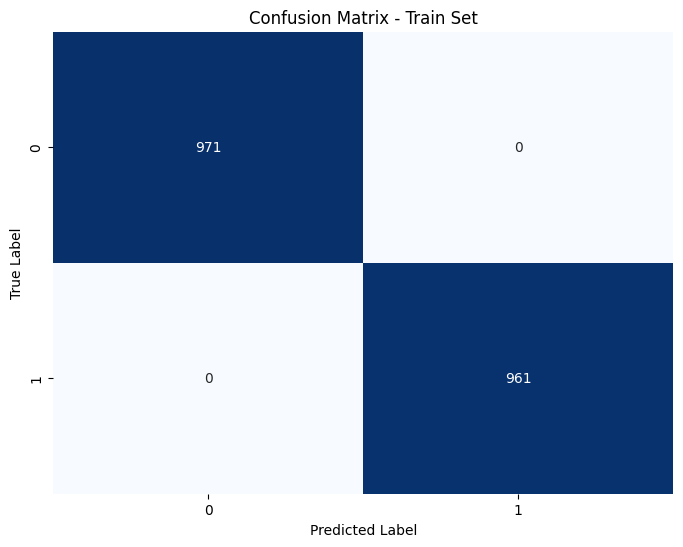

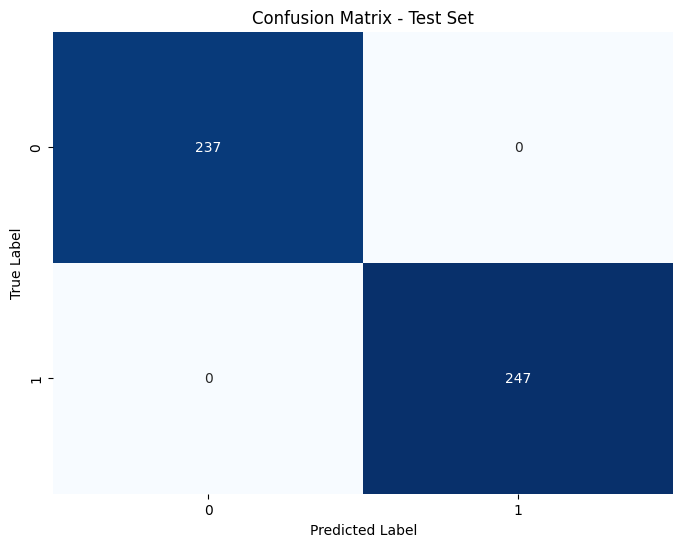

In [69]:
# Plot confusion matrix for train set
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - Train Set')
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - Test Set')
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Predict the probabilities for each class instead of the predicted class labels
y_pred_proba_train = best_dt_classifier.predict_proba(x_train)
y_pred_proba_test = best_dt_classifier.predict_proba(x_test)

# Predicted class labels
y_pred_train = best_dt_classifier.predict(x_train)
y_pred_test = best_dt_classifier.predict(x_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Precision
train_precision = precision_score(y_train, y_pred_train, average='weighted')
test_precision = precision_score(y_test, y_pred_test, average='weighted')

# Recall
train_recall = recall_score(y_train, y_pred_train, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')

# F1-score
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

# ROC AUC score
train_roc_auc = roc_auc_score(y_train, y_pred_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_test, multi_class='ovr')

# Log loss
train_log_loss = log_loss(y_train, y_pred_proba_train)
test_log_loss = log_loss(y_test, y_pred_proba_test)

# Print the scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train F1-score:", train_f1_score)
print("Test F1-score:", test_f1_score)
print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)
print("Train Log Loss:", train_log_loss)
print("Test Log Loss:", test_log_loss)


Train Accuracy: 1.0
Test Accuracy: 1.0
Train Precision: 1.0
Test Precision: 1.0
Train Recall: 1.0
Test Recall: 1.0
Train F1-score: 1.0
Test F1-score: 1.0
Train ROC AUC: 1.0
Test ROC AUC: 1.0
Train Log Loss: 2.2204460492503136e-16
Test Log Loss: 2.2204460492503136e-16


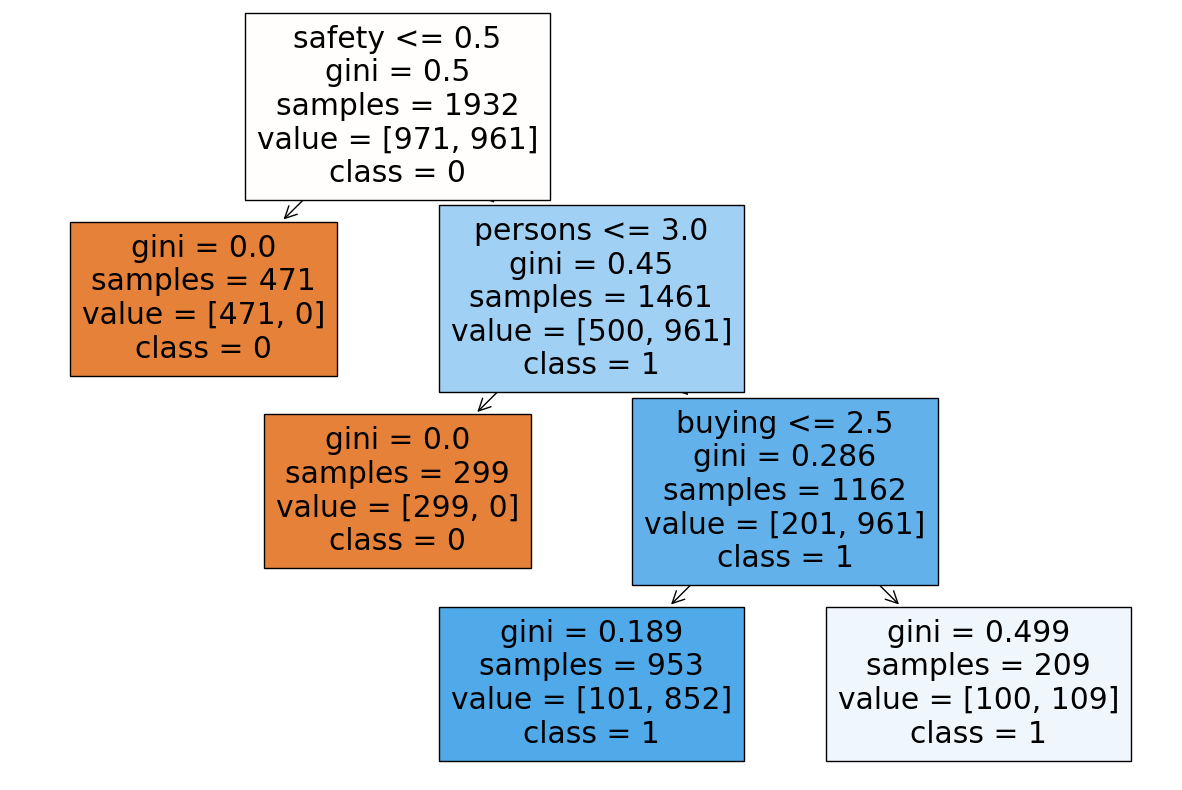

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree classifier with limited depth
limited_depth_dt = DecisionTreeClassifier(max_depth=3)
limited_depth_dt.fit(x_train, y_train)

# Plot the limited depth decision tree
plt.figure(figsize=(15, 10))
plot_tree(limited_depth_dt, filled=True, feature_names=x.columns, class_names=['0', '1'])
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search Cross-Validation (GridSearchCV) for hyperparameter optimization. GridSearchCV systematically searches for the best combination of hyperparameters from a predefined grid of values. It performs cross-validation to evaluate each combination, which helps in finding the optimal hyperparameters that generalize well to unseen data. This technique is commonly used because it automates the process of tuning hyperparameters and ensures that the model is not overfitting to the training data.

Here, notably we have seen improvement in each aspect of the model. For the decision tree model we have got 100% score in each evaluation metrics which means surprisingly our modeel is 100 % correct.

## **Conclusion** 😍


From the above evaluated matrics we can make some conclusions -
In decision tree classifier model, the score of all metrics such as accuracy, precision, recall, and F1 score have a perfect score of 1.00, it generally indicates that the model's performance is excellent and flawless on the given dataset.

* Accuracy measures the proportion of correctly classified instances among the total number of instances.  An accuracy score of 1.00 means that the model has correctly classified all instances in the dataset without any errors. It implies that the model's predictions perfectly match the actual labels.
* Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision score of 1.00 indicates that every positive prediction made by the model is indeed correct. There are no false positives, meaning that the model doesn't mistakenly classify any negative instance as positive.
* Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. A recall score of 1.00 implies that the model identifies all positive instances correctly, without missing any. There are no false negatives, meaning that the model doesn't miss any positive instance.
* The F1 score is the harmonic mean of precision and recall. A perfect F1 score of 1.00 means that the model has achieved both perfect precision and perfect recall simultaneously. It indicates an ideal balance between precision and recall, resulting in flawless performance in terms of both false positives and false negatives.

In summary, when all metrics have a score of 1.00, it suggests that the model is performing optimally, making accurate predictions with no errors. Overall, the model appears to perform well across multiple evaluation metrics, suggesting that it is effective for the given binary classification task.

